In [30]:
def plot_scatter(target_runs, y_key):
    import plotly.express as px
    import pandas as pd
    import math
    
    # Assuming target_runs is prepared with your data
    # Convert target_runs to a DataFrame for easier manipulation with Plotly
    df = pd.DataFrame(target_runs, columns=['fc1', 'fc2', 'fc3', 'lr', 'width'])
    
    # Apply log scale to lr for the plot
    df['log_lr'] = df['lr'].apply(lambda x: math.log2(x))
    
    # Creating the plot
    fig = px.line(df, x='log_lr', y=y_key,
                  color='width',  # This separates the lines by width
                  hover_data=['width'],  # This adds the width to the hover information
                  title='Training Loss vs. Log-Scaled Learning Rate',
                  labels={'log_lr': 'Log Scale Learning Rate (log2(lr))', 'train_loss': 'Training Loss', 'width': 'Width'})
    
    # Update the line titles to include the width value
    for width, trace in zip(df['width'].unique(), fig.data):
        trace.name = f'Width: {width}'

    y_min = df[y_key].min()  # Adjust the lower bound as needed
    y_max = 0.1  # Adjust the upper bound as needed
    fig.update_yaxes(range=[y_min, y_max])
    
    return fig

In [42]:
def extract_runs(is_mup):
    target_runs = []
    for run in runs:
        # if run.config["config"]["num_layers"] == num_layers and run.config["config"]["batch_size"] == batch_size:
        #     # train_loss = run.history()["mup_loss"].iloc[-1]
        #     # eval_loss = run.history()["ref_eval_loss"].iloc[-1]
        if is_mup:
            # fc1 = run.summary["mup_fc_1"]
            # fc2 = run.summary["mup_fc_2"]
            # fc3 = run.summary["mup_fc_3"]
            fc1 = run.history()["mup_fc_1"].iloc[-1]
            fc2 = run.history()["mup_fc_2"].iloc[-1]
            fc3 = run.history()["mup_fc_3"].iloc[-1]
        else:
            fc1 = run.history()["ref_fc_1"].iloc[-1]
            fc2 = run.history()["ref_fc_2"].iloc[-1]
            fc3 = run.history()["ref_fc_3"].iloc[-1]

        # eval_loss = 99 if eval_loss == "nan" else eval_loss
        lr = run.config["config"]["lr"]
        width = run.config["config"]["target_width"]
        target_runs.append((fc1, fc2, fc3, lr, width))

    return target_runs

In [46]:
import wandb

api = wandb.Api()
# entity, project = "neuralink", "exp20_single_mup_adam_bs_64_20_epochs"  # set to your entity and project 
entity, project = "neuralink", "exp14_mup_grid_search"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

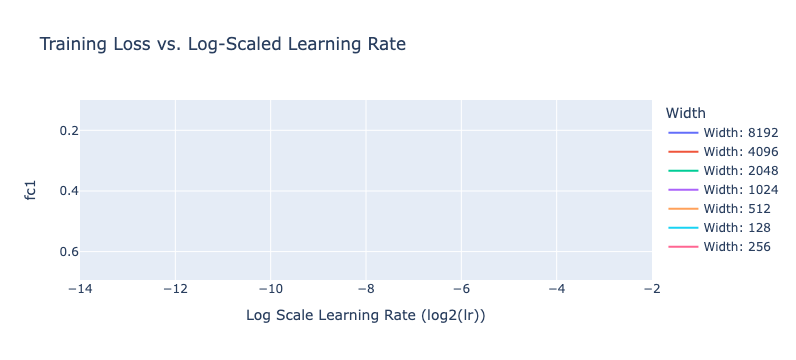

In [45]:
plot_scatter(extract_runs(is_mup=True), y_key="fc1").show()

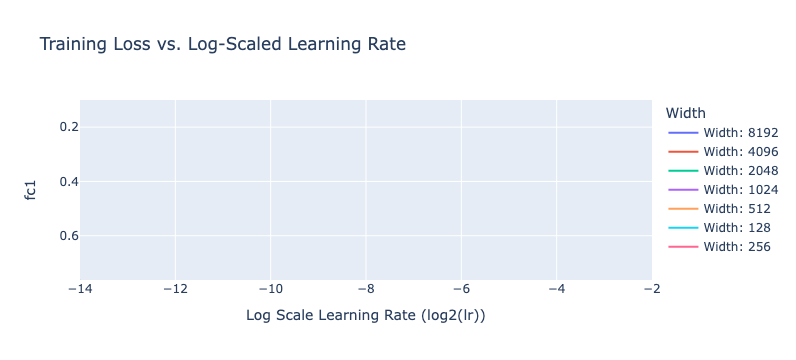

In [35]:
plot_scatter(extract_runs(is_mup=False), y_key="fc1").show()

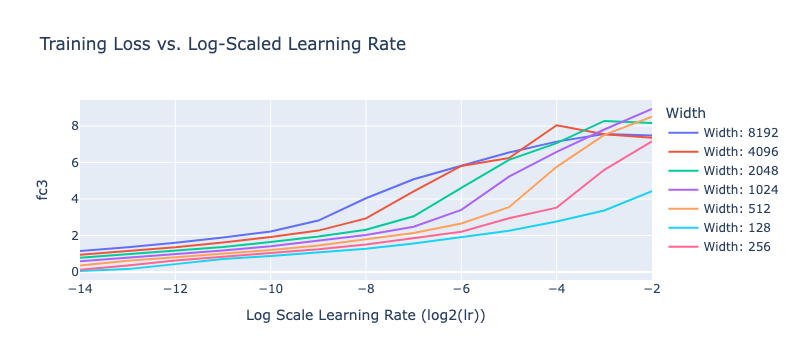

In [37]:
plot_scatter(extract_runs(is_mup=True), y_key="fc3").show()

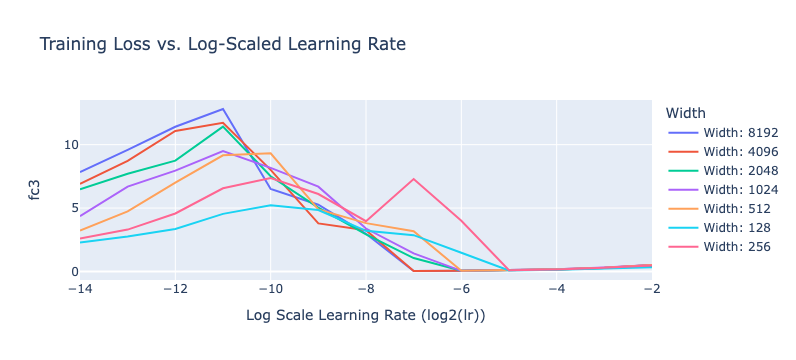

In [36]:
plot_scatter(extract_runs(is_mup=False), y_key="fc3").show()